<a href="https://colab.research.google.com/github/keywoong/deeplearning_with_python/blob/main/6_1_Deep_learning_for_text_and_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.1 Word-level one-hot encoding(toy example)

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework' ]
#초기 데이터, 

token_index = {}
# 데이터 내 모든 토큰에 index를 부여함. 지금 이 예제는 토큰이 단어이므로 단어마다 index값을 부여한다.

for sample in samples:
    for word in sample.split(): 
         #빈칸을 기준으로 각각의 단어를 word에다가 입력
        if word not in token_index: 
            #만약 token_index에 있지 않은 새로운 단어라면,
            token_index[word] = len(token_index) + 1
            #word가 발견된 횟수 index에 해당하는 token_index에 값을 넣는다. 
            # 만약 0번째라면 1을, 3번째라면 4를 넣는다. 
print('This is token_index')
print(token_index)
            
max_length = 10
#샘플을 벡터화 시킨다. 각 샘플에서 단어 수가 가장 많은 샘플을 기준으로 한다.

results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))
# 3차원 형태. This is where I store the results

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # sample을 split하여 얻은 단어를 list에 넣는다.
        index = token_index.get(word)
        
        results[i, j, index] = 1.
    
print('This is results')
for i in range(len(samples)):
    print(samples[i])
    print(results[i])

This is token_index
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework': 10}
This is results
The cat sat on the mat.
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The dog ate my homework
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 6.2 Character-level one-hot encoding (toy example)

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# 문자 단위로 끊어서 파악할 샘플.

characters = string.printable 
#all printable ASCII characters

print('>> This is Ascii codes')
print(characters)

token_index = dict(zip(range(1, len(characters) + 1), characters))
#token_index을 하나의 사전처럼 제작. 
print('This is Token_index dictionary')
print(token_index)

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(samples):
        index = token_index.get(character)
        results[i, j, index] = 1
        
print(results)
    

>> This is Ascii codes
0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

This is Token_index dictionary
{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' '

## 6.3 Using Keras for word-level one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework']

tokenizer = Tokenizer(num_words = 1000) # 가장 많이 나오는 단어를 1000번째 까지 생성
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
# 문자 형태의 samples를 정수 형태의 list로 바꾸어준다.

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

print(word_index)

Found 9 unique tokens.
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


## 6.4 Word-level one-hot encoding with hashing trick(toy example)

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework']

dimensionality = 1000 #전체 단어의 개수, num_words
# 만약 1000개 이상의 단어가 존재한다면 해쉬 충돌이 발생한다. 
max_length = 10
# 한개의 샘플 내 총 단어의 개수는 최대 10개

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split())) [:max_length]:
        index = abs(hash(word)) % dimensionality
        # 단어를 0부터 1000사이의 임의의 값에 매칭시킨다. 
        results[i,j,index] = 1.
        
print(results[1][4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
a = results[1][4]

print(len(a))

1000


## 6.5 Instantiating an Embedding layer

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

## 6.6 Loading the IMDB data for use an Embedding layer

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)
# 정수 리스트 형태를 2차원 텐서로 바꾸어준다. (samples, maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(x_train.shape)

(25000, 20)


## 6.7 Using an Embedding layer and classifier on the IMDB data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8 ,input_length = maxlen))

model.add(Flatten()) #3차원 텐서를 2차원 텐서로 flatten 시킨다. 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 3ms/step - loss: 0.6861 - acc: 0.5583 - val_loss: 0.6180 - val_acc: 0.6980
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5678 - acc: 0.7471 - val_loss: 0.5215 - val_acc: 0.7322
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4684 - acc: 0.7832 - val_loss: 0.4980 - va

## 6.8 Processing the labels of the raw IMDB data

In [ ]:
import os

imdb_dir = 'kaggle\\imdb\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r',encoding = "utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

FileNotFoundError: ignored

## 6.9 Tokenizing the text of the raw IMDB data

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버린다. 
training_samples = 200 # 훈련 샘플은 200개
validation_samples = 10000 # 검증 샘플은 10000개이다.
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10000개의 단어만 사용한다.

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았다.'%len(word_index))

In [ ]:
print(word_index)

In [ ]:
data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기', data.shape)
print('레이블 텐서의 크기', labels.shape)

In [ ]:
print(data.shape[0])

In [ ]:
# 데이터를 훈련 세트와 검증 세트로 분할입니다. 
# 샘플이 순서대로 있기 때문에 (부정 다음 긍정)
# 먼저 데이터를 섞습니다. 

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

## 6.10 Parsing the GloVe word-embeddings file

In [ ]:
glove_dir = 'kaggle\\glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = "UTF-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print(values[0])
print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
print('This is Word')
print(word)
print('This is coefs')
print(coefs)

In [ ]:
print(values[0][])

In [ ]:
print(embeddings_index[values[0]])

[ 0.28365   -0.6263    -0.44351    0.2177    -0.087421  -0.17062
  0.29266   -0.024899   0.26414   -0.17023    0.25817    0.097484
 -0.33103   -0.43859    0.0095799  0.095624  -0.17777    0.38886
  0.27151    0.14742   -0.43973   -0.26588   -0.024271   0.27186
 -0.36761   -0.24827   -0.20815    0.22128   -0.044409   0.021373
  0.24594    0.26143    0.29303    0.13281    0.082232  -0.12869
  0.1622    -0.22567   -0.060348   0.28703    0.11381    0.34839
  0.3419     0.36996   -0.13592    0.0062694  0.080317   0.0036251
  0.43093    0.01882    0.31008    0.16722    0.074112  -0.37745
  0.47363    0.41284    0.24471    0.075965  -0.51725   -0.49481
  0.526     -0.074645   0.41434   -0.1956    -0.16544   -0.045649
 -0.40153   -0.13136   -0.4672     0.18825    0.2612     0.16854
  0.22615    0.62992   -0.1288     0.055841   0.01928    0.024572
  0.46875    0.2582    -0.31672    0.048591   0.3277    -0.50141
  0.30855    0.11997   -0.25768   -0.039867  -0.059672   0.5525
  0.13885   -0.22862

In [ ]:
print(max_words)
# 가장 빈도 높은 단어를 10000개까지 사용. 

10000


# 6.11 Preparing the GloVe word-embeddings matrix

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
# 각 단어마다 100차원을 가지고 있음.

for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 된다.
            embedding_matrix[i] = embedding_vector

In [ ]:
print(word_index.get(word))

72633


## 6.12 Model Definition

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## 6.13 Loading pretrained word embeddings into the Embedding layer

In [ ]:
# model.layers[0] == Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
for i in range(len(model.layers)):
    print(model.layers[i])

## 6.14 Training and evaluation

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 233ms/step - loss: 1.9261 - acc: 0.6150 - val_loss: 1.1979 - val_acc: 0.7218
Epoch 2/10
7/7 [==============================] - 1s 184ms/step - loss: 0.3873 - acc: 0.8350 - val_loss: 0.9809 - val_acc: 0.7218
Epoch 3/10
7/7 [==============================] - 1s 185ms/step - loss: 0.2768 - acc: 0.8950 - val_loss: 1.5442 - val_acc: 0.2816
Epoch 4/10
7/7 [==============================] - 1s 181ms/step - loss: 0.4414 - acc: 0.7900 - val_loss: 0.6378 - val_acc: 0.7206
Epoch 5/10
7/7 [==============================] - 1s 194ms/step - loss: 0.0857 - acc: 0.9950 - val_loss: 0.8118 - val_acc: 0.7224
Epoch 6/10
7/7 [==============================] - 1s 195ms/step - loss: 0.0544 - acc: 0.9950 - val_loss: 0.6258 - val_acc: 0.7153
Epoch 7/10
7/7 [==============================] - 1s 200ms/step - loss: 0.0361 - acc: 1.0000 - val_loss: 0.7058 - val_acc: 0.7211
Epoch 8/10
7/7 [==============================] - 1s 183ms/step - loss: 0.0251 - acc: 1.00

## 6.15 Plotting the results

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
#acc의 개수. 총 10번 실행시켰으니 len(acc) == 10

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.16 Training the same model without pretrained word embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## 6.17 Tokenizing the data of the test set

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg','pos']:
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 32: illegal multibyte sequence

## 6.21 Numpy implementation of a simple RNN

In [ ]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, axis = 0)

In [ ]:
from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32)) # Embedding(max_words, embedding_dim)
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## 6.22 Preparing the IMDB data

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이 (가장 빈번하게 사용되는 max_features개의 단어만 사용한다.)
barch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test),'test sequences')

print('Pad Sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train 크기 : ', input_train.shape)
print('input_test 크기 : ', input_test.shape)

'''
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

=> Pads sequences to the same length
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
이 줄에서는 불규칙한 길이를 가진 input_train 데이터들을 maxlen이라는 길이로 맞춰주어라라는 의미이다. 

'''

Loading data...
25000 train sequences
25000 test sequences
Pad Sequences (samples x time)
input_train 크기 :  (25000, 500)
input_test 크기 :  (25000, 500)


"\ntf.keras.preprocessing.sequence.pad_sequences(\n    sequences, maxlen=None, dtype='int32', padding='pre',\n    truncating='pre', value=0.0\n)\n\n=> Pads sequences to the same length\ninput_train = sequence.pad_sequences(input_train, maxlen = maxlen)\n이 줄에서는 불규칙한 길이를 가진 input_train 데이터들을 maxlen이라는 길이로 맞춰주어라라는 의미이다. \n\n"

## 6.23 Training the model with Embedding and SimpleRNN layers

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)


Epoch 1/10
157/157 [==============================] - 37s 236ms/step - loss: 0.5888 - acc: 0.6668 - val_loss: 0.4273 - val_acc: 0.8110
Epoch 2/10
157/157 [==============================] - 44s 278ms/step - loss: 0.3873 - acc: 0.8385 - val_loss: 0.3592 - val_acc: 0.8516
Epoch 3/10
157/157 [==============================] - 41s 259ms/step - loss: 0.2840 - acc: 0.8892 - val_loss: 0.5189 - val_acc: 0.7982
Epoch 4/10
157/157 [==============================] - 41s 261ms/step - loss: 0.2426 - acc: 0.9071 - val_loss: 0.3399 - val_acc: 0.8646
Epoch 5/10
157/157 [==============================] - 40s 255ms/step - loss: 0.1971 - acc: 0.9275 - val_loss: 0.4036 - val_acc: 0.8618
Epoch 6/10
157/157 [==============================] - 40s 257ms/step - loss: 0.1586 - acc: 0.9425 - val_loss: 0.4196 - val_acc: 0.8338
Epoch 7/10
157/157 [==============================] - 41s 259ms/step - loss: 0.1207 - acc: 0.9585 - val_loss: 0.4125 - val_acc: 0.8396
Epoch 8/10
157/157 [==============================] - 4

## 6.24 Plotting results

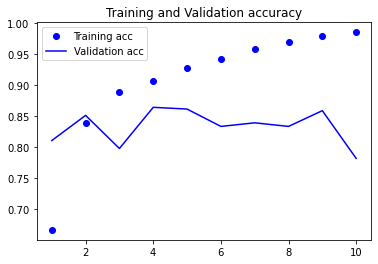

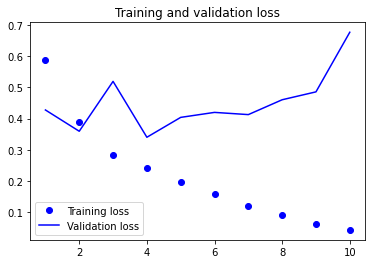

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc)+1 )

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.27 Using the LSTM layer in Keras

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 121s 772ms/step - loss: 0.5091 - acc: 0.7527 - val_loss: 0.3570 - val_acc: 0.8538
Epoch 2/10
157/157 [==============================] - 140s 892ms/step - loss: 0.3077 - acc: 0.8784 - val_loss: 0.2992 - val_acc: 0.8788
Epoch 3/10
157/157 [==============================] - 132s 838ms/step - loss: 0.2444 - acc: 0.9054 - val_loss: 0.2834 - val_acc: 0.8872
Epoch 4/10
157/157 [==============================] - 136s 864ms/step - loss: 0.2042 - acc: 0.9245 - val_loss: 0.3564 - val_acc: 0.8466
Epoch 5/10
157/157 [==============================] - 125s 797ms/step - loss: 0.1776 - acc: 0.9361 - val_loss: 0.4838 - val_acc: 0.8480
Epoch 6/10
157/157 [==============================] - 125s 795ms/step - loss: 0.1645 - acc: 0.9405 - val_loss: 0.3656 - val_acc: 0.8796
Epoch 7/10
157/157 [==============================] - 125s 795ms/step - loss: 0.1458 - acc: 0.9495 - val_loss: 0.3559 - val_acc: 0.8820
Epoch 8/10
157/157 [============================

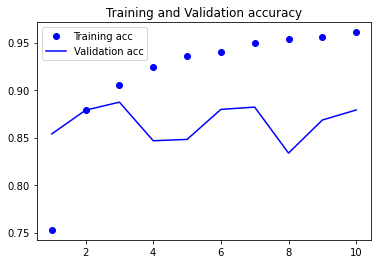

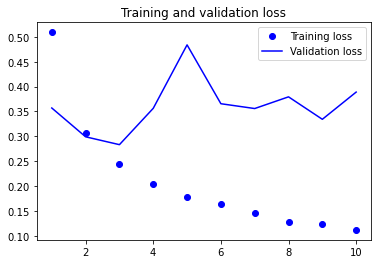

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc)+1 )

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.28 Inspecting the data of the Jena weather dataset

In [ ]:
import os
data_dir = 'kaggle\\jena_climate_2009_2016.'
# 데이서셋이 위치한 경로
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
# data_dir에서 위의 csv파일을 가져온다.
# csv vs xls
'''
csv는 ,로 구분된 값이고 xls는 스프레드 시트 형식이다. 
'''

f= open(fname, encoding = 'UTF-8')
data= f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
# header = 칼럼
lines = lines[1:]
# 칼럼을 제외한 아래의 것들

# 가로 길이 : len(lines), 420451
# 세로 길이 : len(header)-1 ,14

print('>> This is header')
print(header)
print('>> This is len(lines)')
print(len(lines))

>> This is header
['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']
>> This is len(lines)
420452


In [ ]:
print(type(x))
y = float(x)
print(type(y))

<class 'str'>
<class 'float'>


## 6.29 Parsing the data

In [ ]:
import numpy as np

float_data = np.zeros((len(lines), len(header) -1))
# 420452 x 15 shape의 float_data를 생성.
# 세로의 개수가 420452이고 가로가 15. 즉 csv내의 모든 데이터를 담을 수 있는 size의 배열을 만든다.
# line(header)-1인 이유는 칼럼에서 맨 첫번째 줄 Date time을 빼기 위해

for i, line in enumerate(lines):
    # csv내의 모든 데이터를 돌면서
    values = [float(x) for x in line.split(',')[1:]]
    # 맨 첫번째 세로줄 제외.
    float_data[i,:] = values
    # 모든 데이터 값들을 float_data에 넣는다.

print('>> This is float_data')
print(float_data)

ValueError: cannot copy sequence with size 0 to array axis with dimension 14

## 6.30 Plotting the temparature timeseries

In [ ]:
from matplotlib import pyplot as plt

temp = float_data[:,1]
plt.plot(range(len(temp)), temp)

print('>> This is len(temp)')
print(len(temp))

NameError: name 'float_data' is not defined

## 6.31 Plotting the first 10 days of the temparature timeseries

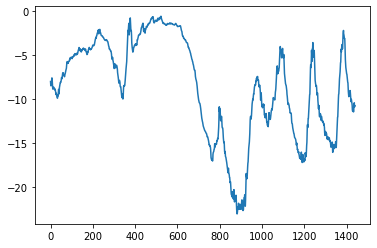

In [ ]:
plt.plot(range(1440), temp[:1440])
# 24*60*10 / 10 = 1440

## 6.32 Normalizing the data

In [ ]:
mean = float_data[:200000].mean(axis = 0)
float_data -= mean
std = float_data[:200000].std(axis = 0)
float_data /= std

#training data만 정규화시킴.

In [ ]:
print(len(mean))

14


## 6.33 Generator yielding timeseries samples and their targets

In [ ]:
def generator(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128, step = 6):
    if max_index is None:
        # 만약 training 데이터인지, test 데이터인지 정해지지 않았다면,
        # test_gen이 이러한 경우에 포함됨
        max_index = len(data) - delay - 1
        # 전체 데이터 맨 끝에서 delay만큼 뒤로 가는 것을 max_length로 정함.
        # delay만큼 뒤에 남겨놔야 예측할 타겟값이 존재하기 때문이다.
        
    i = min_index + lookback
    # i는 뭔지 잘 모르겠지만 아마 현재 위치? 를 말하는듯함.
    while 1:
        if shuffle:
            # 만약 설정할 때 shuffle을 하도록 설정했다면,
            rows = np.random.randint(min_index + lookback, max_index, size = batch_size)
            # np.randint
            '''
            random.randint() 함수는 [최소값, 최대값)의 범위에서 임의의 정수를 만듭니다.
            '''
            # 현재 위치에서 max_index까지
        else:
            # 만약 shuffle을 하지 않도록 설정했다면,
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            # np.arange
            '''
            np.arnage(3)은 객체 array([0,1,2])를 반환
            np.arange(3,10)은 3~10 에서 끝나도록 간격을 1만큼 반환
            np.arange(3,10,2)는 3~10만큼 2를 간격으로 반환
            '''
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

## 6.34 Preparing the trainig, validation and test generators

In [ ]:
lookback = 1440 #입력으로 사용하기 위해 거슬러 올라갈 타임스텝, 10일을 말함
step = 6 # 데이터를 샘플링할 타임스텝 간격
delay = 144 # 목표값으로 설정할 미래의 타임스텝
batch_size = 128 # 배치 샘플 수, 가중치 업데이트 주기

train_gen = generator(
    float_data,
    lookback = lookback,
    delay = delay,
    min_index = 0,
    max_index = 200000,
    shuffle = True,
    step = step,
    batch_size = batch_size
)

val_gen = generator(
    float_data,
    lookback = lookback,
    delay = delay,
    min_index = 200001,
    max_index = 300000,
    step = step,
    batch_size = batch_size
)

test_gen = generator(
    float_data,
    lookback = lookback,
    delay = delay,
    min_index = 300001,
    max_index = None,
    step = step,
    batch_size = batch_size
)

#전체 validation set를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

#전체 test set을 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
print(val_steps)
print(test_steps)

769
929


## 6.35 Computing the common-sense baseline MAE

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        # 평가를 하는 과정. 
        samples, targets = next(val_gen)
        # next
        '''
        next는 기본값을 지정할 수 있습니다. 
        기본값을 지정하면 반복이 끝나더라도 StopIteration이 발생하지 않고 기본값을 출력합니다. 
        즉, 반복할 수 있을 때는 해당 값을 출력하고, 반복이 끝났을 때는 기본값을 출력합니다
        '''
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds - targets))
        # 예측값과 실제값의 차이의 절댓값들의 평균
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


## 6.36 Converting the MAE back to a Celsius error

In [ ]:
celcius_name = 2.56*std[1]

print(celcius_name)

22.66239765044383


## 6.37 Training and evaluating a densely connected model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback // step, float_data.shape[-1])))
# 
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(
    train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, 
    validation_steps = val_steps
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 17s 34ms/step - loss: 2.5164 - val_loss: 1.2641
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 2.2509 - val_loss: 1.0357
Epoch 3/20
500/500 [==============================] - 19s 38ms/step - loss: 1.6071 - val_loss: 1.1943
Epoch 4/20
500/500 [==============================] - 17s 34ms/step - loss: 1.2626 - val_loss: 1.2649
Epoch 5/20
500/500 [==============================] - 17s 34ms/step - loss: 0.9317 - val_loss: 1.2034
Epoch 6/20
500/500 [==============================] - 17s 35ms/step - loss: 0.7020 - val_loss: 0.5995
Epoch 7/20
500/500 [==============================] - 17s 35ms/step - loss: 0.5793 - val_loss: 0.9343
Epoch 8/20
500/500 [==============================] - 17s 35ms/step - loss: 0.4137 - val_loss: 0.8790
Epoch 9/20
500/500 [==============================] - 17s 35ms/step - loss: 0.4207 - val_loss: 0.5949
Epoch 

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae', metrics = ['acc'])
history = model.fit_generator(
    train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, 
    validation_steps = val_steps
)

Epoch 1/20
500/500 [==============================] - 18s 35ms/step - loss: 1.1581 - acc: 0.0000e+00 - val_loss: 2.7607 - val_acc: 0.0000e+00
Epoch 2/20
500/500 [==============================] - 18s 35ms/step - loss: 3.0437 - acc: 0.0000e+00 - val_loss: 1.8063 - val_acc: 0.0000e+00
Epoch 3/20
500/500 [==============================] - 17s 34ms/step - loss: 1.5507 - acc: 0.0000e+00 - val_loss: 1.6902 - val_acc: 0.0000e+00
Epoch 4/20
500/500 [==============================] - 17s 34ms/step - loss: 1.3461 - acc: 0.0000e+00 - val_loss: 1.4412 - val_acc: 0.0000e+00
Epoch 5/20
500/500 [==============================] - 17s 35ms/step - loss: 0.9139 - acc: 0.0000e+00 - val_loss: 1.9963 - val_acc: 0.0000e+00
Epoch 6/20
500/500 [==============================] - 17s 35ms/step - loss: 0.6477 - acc: 0.0000e+00 - val_loss: 0.7274 - val_acc: 0.0000e+00
Epoch 7/20
500/500 [==============================] - 17s 35ms/step - loss: 0.5095 - acc: 0.0000e+00 - val_loss: 0.9968 - val_acc: 0.0000e+00
Epoch 

## 6.38 Plotting results

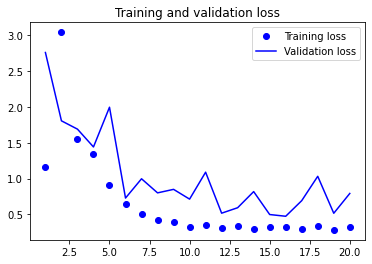

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.39 Training and evaluating a GRU-based model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(
    train_gen, steps_per_epoch = 500,
    epochs = 20,
    validation_data = val_gen, validation_steps = val_steps
)

Epoch 1/20
  2/500 [..............................] - ETA: 50s - loss: 0.3013

KeyboardInterrupt: 